In [1]:
import pandas as pd
data = pd.read_csv('tested.csv')  


In [4]:
print(data.head())  
print(data.info())
print(data.describe()) 


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())


In [8]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [10]:
data = data.drop(columns=['Cabin'])


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])


In [14]:
X = data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = data['Survived']


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


<Axes: >

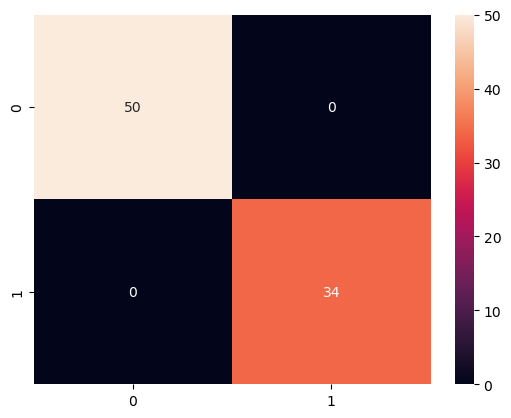

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
import numpy as np  

importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for index in sorted_indices:
    print(f"{X.columns[index]}: {importances[index]}")


Sex: 0.8403614566140616
Fare: 0.055608986223906344
Age: 0.03949918922473929
Parch: 0.02281654132805938
SibSp: 0.014856960087430269
Embarked: 0.014651598193787634
Pclass: 0.012205268328015642


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean()}")


Cross-Validation Accuracy: 1.0


In [36]:
import joblib
joblib.dump(model, 'titanic_survival_model.pkl')


['titanic_survival_model.pkl']